In [1]:
from draw_funcs import draw_1d_hist, draw_1d_hists
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
# %%bash
# rm -rf build
# rm -rf install
# mkdir build
# mkdir install
# cd build
# cmake -DCMAKE_INSTALL_PREFIX=../install ../source
# make -j8
# make install

-- The C compiler identification is GNU 12.2.0
-- The CXX compiler identification is GNU 12.2.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/sbin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/sbin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Boost: /usr/lib64/cmake/Boost-1.80.0/BoostConfig.cmake (found version "1.80.0") found components: program_options 
-- Found nlohmann_json: /usr/share/cmake/nlohmann_json/nlohmann_jsonConfig.cmake (found suitable version "3.11.2", minimum required is "3.11.2") 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/hep/workdir/notebooks/KsKs2pi/build
[ 33%] Building CXX object CMakeFiles/kf-2ks2pi-run.dir/src/TrPh.cpp.o
[ 66%] Building CXX object CMakeFi

In [3]:
mfield = 1.3
input_path = '/var/kinfit/data/tr_ph_run026886.root'
output_path = 'kinfit_ksks2pi_run026886.root'

In [4]:
# %%bash -s "$input_path" "$output_path" "$mfield"
# source install/bin/env.sh
# kf-2ks2pi-run -i $1 -o $2 -m $3

0 / 50000
100 / 50000
200 / 50000
300 / 50000
400 / 50000
500 / 50000
600 / 50000
700 / 50000
800 / 50000
900 / 50000
1000 / 50000
1100 / 50000
1200 / 50000
1300 / 50000
1400 / 50000
1500 / 50000
1600 / 50000
1700 / 50000
1800 / 50000
1900 / 50000
2000 / 50000
2100 / 50000
2200 / 50000
2300 / 50000
2400 / 50000
2500 / 50000
2600 / 50000
2700 / 50000
2800 / 50000
2900 / 50000
3000 / 50000
3100 / 50000
3200 / 50000
3300 / 50000
3400 / 50000
3500 / 50000
3600 / 50000
3700 / 50000
3800 / 50000
3900 / 50000
4000 / 50000
4100 / 50000
4200 / 50000
4300 / 50000
4400 / 50000
4500 / 50000
4600 / 50000
4700 / 50000
4800 / 50000
4900 / 50000
5000 / 50000
5100 / 50000
5200 / 50000
5300 / 50000
5400 / 50000
5500 / 50000
5600 / 50000
5700 / 50000
5800 / 50000
5900 / 50000
6000 / 50000
6100 / 50000
6200 / 50000
6300 / 50000
6400 / 50000
6500 / 50000
6600 / 50000
6700 / 50000
6800 / 50000
6900 / 50000
7000 / 50000
7100 / 50000
7200 / 50000
7300 / 50000
7400 / 50000
7500 / 50000
7600 / 50000
7700 / 5000

In [5]:
fl = TFile.Open(output_path, 'read')

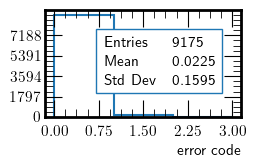

In [6]:
fl.kf_data.Draw("kf_err>>kf_err_kskpi(3,0,3)", "", "goff")
draw_1d_hist("kf_err_kskpi", xlabel='error code',
            fraction=0.47,
             info_coords=(0.3, 0.3))
plt.savefig('kf_err_xx2pi.eps')

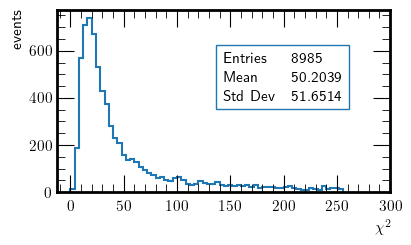

In [21]:
fl.kf_data.Draw("kf_chi2>>kf_chi2_kskpi(64,0,256)", "kf_err==0", "goff")
draw_1d_hist("kf_chi2_kskpi", xlabel=r'$\chi^2$',
             ylabel='events',
            fraction=0.8,
             info_coords=(0.5, 0.5),
            h_y=200, h_x=50)
plt.savefig('kf_chi2_xx2pi.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


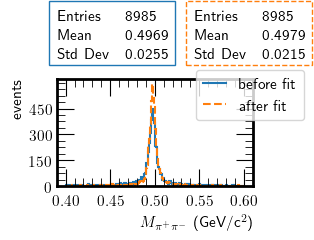

In [31]:
fl.kf_data.Draw("in_mks1>>in_mks1(256,0.4,0.6)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_mks1>>kf_mks1(256,0.4,0.6)", "kf_err==0", "goff")
draw_1d_hists([('in_mks1', 'before fit'), ('kf_mks1', 'after fit')], xlabel=r'$M_{\pi^+\pi^-}$ (GeV/c$^2$)',
             ylabel='events',
              fraction=0.47,
             info_coords=(0.0, 1.2),
              dh=0.0,
              dw=0.7,
             legend_loc='center right',
             bbox_to_anchor=(0.9, 0.6, 0.4, 0.5),
             h_y=150, h_x=0.05)
plt.savefig("kf_mks1_xx2pi.eps",  bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


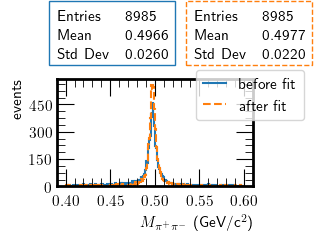

In [33]:
fl.kf_data.Draw("in_mks2>>in_mks2(256,0.4,0.6)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_mks2>>kf_mks2(256,0.4,0.6)", "kf_err==0", "goff")
draw_1d_hists([('in_mks2', 'before fit'), ('kf_mks2', 'after fit')], xlabel=r'$M_{\pi^+\pi^-}$ (GeV/c$^2$)',
              ylabel='events',
             fraction=0.47,
             info_coords=(0.0, 1.2),
              dh=0.0,
              dw=0.7,
             legend_loc='center right',
             bbox_to_anchor=(0.9, 0.6, 0.4, 0.5),
             h_y=150, h_x=0.05)
plt.savefig("kf_mks2_xx2pi.eps",  bbox_inches='tight')

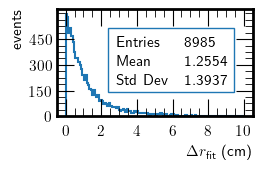

In [38]:
fl.kf_data.Draw("vtx1_dr>>kf_vtx1_dr(128, 0, 10)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx1_dr", xlabel=r'$\Delta r_{\text{fit}}$ (cm)',
             ylabel='events',
            fraction=0.47,
             info_coords=(0.3, 0.3),
            h_y=150, h_x=2)
plt.savefig('kf_vtx_dr1_xx2pi.eps')

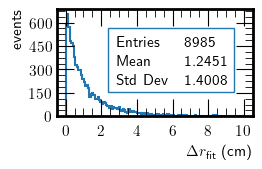

In [39]:
fl.kf_data.Draw("vtx2_dr>>kf_vtx2_dr(128, 0, 10)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx2_dr", xlabel=r'$\Delta r_{\text{fit}}$ (cm)',
             ylabel='events',
             fraction=0.47,
             info_coords=(0.3, 0.3),
            h_y=150, h_x=2)
plt.savefig('kf_vtx_dr2_xx2pi.eps')

In [12]:
# fl.Close()